### Example Facebook Predictions


In [5]:
try:       importlib.reload(Jupytils)
except:    import Jupytils

%reload_ext rmagic 
%reload_ext rpy2.ipython
showTopbar("Asthma Prediction")

<IPython.core.display.Javascript object>

In [17]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies=None
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

df

,sdttm,pname,ampm,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,2015-01-02 06:24:00,hand2,am,Y,22.700,0.004,0.700,0.025,0.024,145.000,0.078,12.790,0.428,0.300,990.300,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,340.000,58.000,2.100,-13.600,1020.500,1025.000,-4.800,-3.900,1022.200,63.000,-8.500,1019.600,35.000,4.600,2.600,28.000
1,2015-01-02 17:30:00,hand2,pm,Y,23.067,0.006,0.900,0.026,0.035,54.000,0.088,13.590,0.388,0.404,647.867,0.004,0.589,0.017,0.018,28.087,-2.500,2.500,290.000,33.000,1.700,-16.600,1021.700,1026.100,-3.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,7.500,2.300,37.000
2,2015-01-03 07:19:00,hand2,am,Y,24.917,0.009,0.900,0.026,0.035,54.000,0.125,17.045,0.299,0.584,886.283,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,180.000,71.000,2.100,-13.800,1022.700,1027.200,-6.900,-0.800,1023.400,71.000,-9.600,1019.900,31.000,8.800,3.500,40.000
3,2015-01-03 18:15:00,hand2,pm,Y,24.750,0.013,1.000,0.018,0.039,54.000,0.172,19.000,0.222,0.718,949.250,0.007,0.768,0.009,0.029,38.354,1.200,1.500,160.000,60.000,4.000,-5.700,1017.100,1021.400,-1.000,1.900,1023.400,71.000,-9.600,1017.100,33.000,11.500,6.300,38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,2016-10-17 18:21:00,hand2,pm,Y,23.217,0.004,0.700,0.055,0.037,72.000,0.059,13.430,0.359,0.652,1233.783,0.003,0.578,0.015,0.028,53.142,18.200,2.500,270.000,80.000,16.600,14.600,1013.800,1017.800,17.600,22.400,1014.600,100.000,14.700,1012.600,55.000,7.700,2.000,45.000
1310,2016-10-18 06:00:00,hand2,am,Y,22.817,0.004,0.900,0.055,0.039,72.000,0.066,12.690,0.453,0.625,1205.467,0.003,0.556,0.020,0.027,52.833,11.900,0.600,250.000,100.000,13.800,11.800,1016.100,1020.200,12.900,22.400,1016.200,100.000,11.900,1013.000,55.000,10.500,3.200,45.000
1311,2016-10-18 18:01:00,hand2,pm,Y,23.667,0.006,0.900,0.032,0.064,86.000,0.086,13.802,0.315,0.725,1337.400,0.004,0.583,0.013,0.031,56.510,17.000,0.000,0.000,83.000,16.000,14.000,1015.000,1019.000,16.000,20.800,1018.100,100.000,11.000,1013.800,61.000,9.800,4.300,39.000
1312,2016-10-19 06:28:00,hand2,am,G,24.467,0.007,1.000,0.032,0.064,104.000,0.118,18.420,0.199,1.045,1752.667,0.005,0.753,0.008,0.043,71.635,11.700,0.000,0.000,100.000,13.700,11.600,1014.900,1019.000,11.900,20.800,1018.100,100.000,11.000,1014.900,61.000,9.800,3.200,39.000


In [ ]:
columns = '''pefmax,pefcat,so2,co,o3,no2,windspeedms,precipitationpercent,airpressurehpa,tmax,amax'''


In [ ]:
dfAM = df1[df1.am ==1].copy();
dfAM.index = dfAM.index.date
d1=dfAM.index[0:-1]
d2=dfAM.index[1:]
td=d2.values-d1.values
td=[c.days for c in td]
dfAM=dfAM[1:]
dfAM.insert(0, column="DiffDays", value=td)
allDays = pd.date_range(dfAM.index.min(), dfAM.index.max(), freq='D')
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
dfAM[dfAM.DiffDays != 1]
dfAM

In [ ]:
#def MakeContinuous(df):
dfAM = df1[df1.am ==1].copy();
dfAM.index = dfAM.index.date
d1=dfAM.index[0:-1]
d2=dfAM.index[1:]
td=d2.values-d1.values
td=[c.days for c in td]
allDays = pd.date_range(dfAM.index.min(), dfAM.index.max(), freq='D')
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
dfAM

In [ ]:
hh='''<script>
v=$('#header').css('width')
cmd="width='"+v+"'"
Jupyter.notebook.kernel.execute(cmd)
</script>'''
display(HTML(hh))
try:
    pwidth=int(re.search('\d+',width+' 0').group())
except:
    pwidth=1024

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

def plotly(x,y):
    layout = go.Layout( showlegend=False, height=300, width=pwidth )
    line = dict( color = ('rgb(cc, cc, cc)'), width = 1)
    marker=Marker(size=3, color='firebrick')

    ti = go.Scatter( x = x, y = y, line=line, marker=marker, mode = 'lines+markers')

    fig = go.Figure(data=[ti], layout=layout)
    return ti

pdf = dfAM
f1=plotly(pdf.index, pdf.pefmax)
f2=plotly(pdf.index, pdf.precipitationpercent)

#iplot(f1)
iplot([f1,f2], )


In [ ]:
from datetime import datetime
import fbprophet 
from fbprophet import Prophet

prdf = dfAM

prdf['ds'] = prdf.index
prdf['ds'] = pd.DatetimeIndex(prdf.ds)
prdf['y']  = prdf.pefmax
#importlib.reload(fbprophet.Prophet)

my_model1 = Prophet(interval_width=0.95)
#my_model1.extra_regressors={'so2': df1.so2,'co': df1.co, 'no2' :df1.no2, 'precipitationpercent': df1.precipitationpercent}
my_model1.fit(prdf);
prdf=prdf['ds y'.split()]
prdf.index=range(0, len(prdf))
prdf

In [ ]:
future_dates = my_model1.make_future_dataframe(periods=36)#, freq='12h')
display(future_dates[-37::])
forecast = my_model1.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig=plt.figure(figsize=(19,4) )
plt.plot(pdf.ds, pdf.y, label="Orig")
plt.plot(forecast.ds, forecast.yhat, label="Pred")
plt.legend()
df1
my_model1.plot(forecast, uncertainty=True);


In [ ]:
my_model1.plot_components(forecast);

-----
###  SECOND DATA SET 
#### Airline Passenger Prediction using Prophet

In [ ]:
df = LoadDataSet('../data/AirPassengers.csv')
df['Month'] = pd.DatetimeIndex(df['Month'])
df.columns = "ds,y".split(',')
layout = go.Layout( showlegend=False, height=400, width=pwidth )
t2 = go.Scatter( x = df.ds, y = df.y, line=line, marker=marker, mode = 'lines+markers')
fig = go.Figure(data=[t2], layout=layout)
iplot(fig)



In [68]:
from datetime import datetime
import fbprophet 
from fbprophet import Prophet
#importlib.reload(fbprophet.Prophet)

my_model = Prophet(interval_width=0.95)
my_model.fit(df)


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


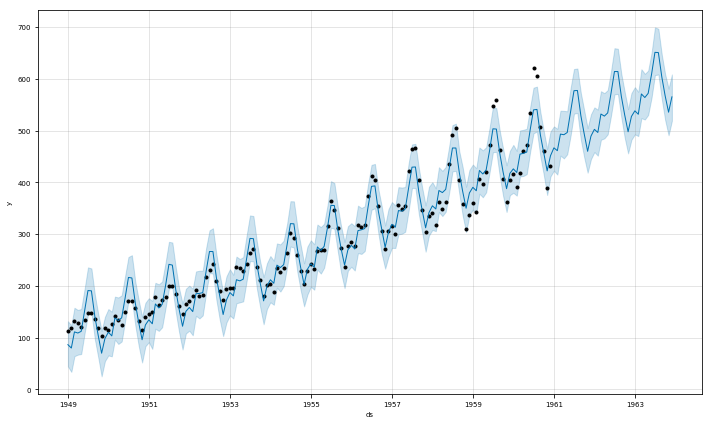

In [70]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

my_model.plot(forecast, uncertainty=True);


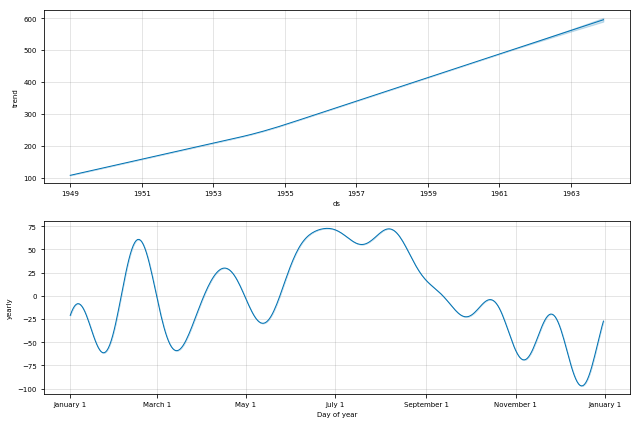

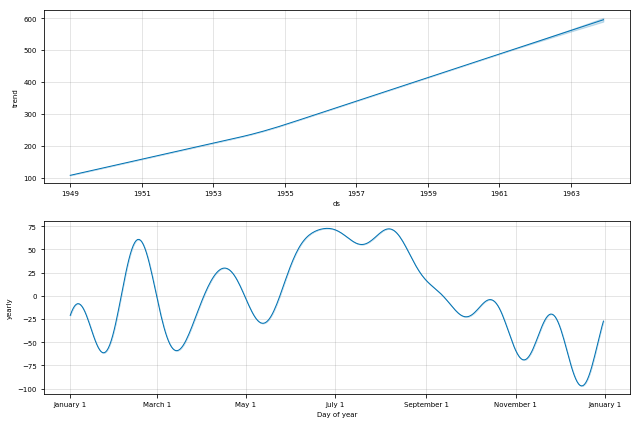

In [11]:
my_model.plot_components(forecast)